In [4]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)
%matplotlib inline
sns.set_context('poster') 

## Loading the Data


In this exercise I will build a logistic regression model using gradient descent to predict whether a student gets admitted into a university. I have historical data from previous applicants that I will use as a training set. For each example, I have applicant's score on two exams and the admissions decision. 

In [5]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

In [6]:
data = loaddata('ex2data1.txt', ',')

Dimensions:  (100, 3)
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


In [90]:
#Feature Space
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
#response
y = np.c_[data[:,2]]

## Plotting the data

In [167]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True,bbox_to_anchor=(0.99,1.04))

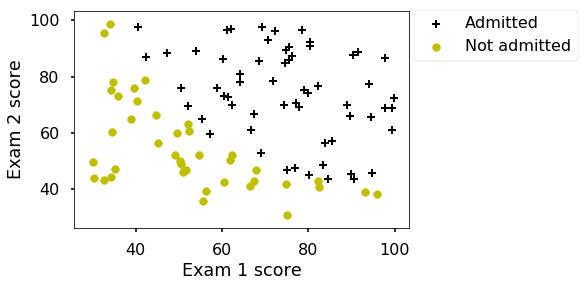

In [168]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

## Gradient Descent

#### Sigmoid Function

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [14]:
def costfunc(theta, X, y):
    m=y.size
    hypothesis=sigmoid(X.dot(theta))
    J= (-1/m)*(np.log(hypothesis).T.dot(y) + np.log(1-hypothesis).T.dot(1-y))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [15]:
def gradientfunc(theta, X, y):
    m=y.size
    hypothesis=sigmoid(X.dot(theta.reshape(-1,1)))

    grad =(1/m)*X.T.dot(hypothesis-y)
    return(grad.flatten())

In [16]:
initial_theta = np.zeros(X.shape[1])
cost = costfunc(initial_theta,X,y)
grad = gradientfunc(initial_theta,X,y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.69314718056
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


### Optimize Cost Function

In [18]:
from scipy.optimize import minimize
res = minimize(costfunc, initial_theta, args=(X,y), method=None, jac=gradientfunc, options={'maxiter':400})
res

C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


      fun: 0.20349770158950983
 hess_inv: array([[  2.85339493e+03,  -2.32908823e+01,  -2.27416470e+01],
       [ -2.32908823e+01,   2.04489131e-01,   1.72969525e-01],
       [ -2.27416470e+01,   1.72969525e-01,   1.96170322e-01]])
      jac: array([ -2.68557631e-09,   4.36433478e-07,  -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

### Predict

In [19]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [20]:
p=predict(X,res.x)
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


#### Decision Boundary

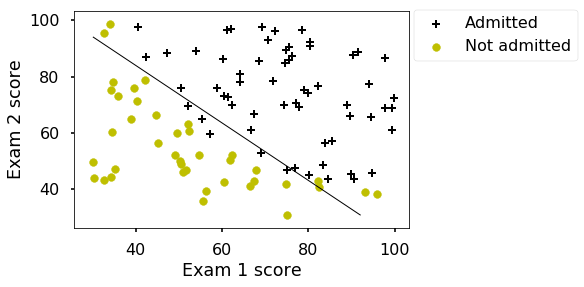

In [128]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='black');

plt.show()

### Regularized Logistic Regression

Here, I will implement regularized logistic regression to predict whether mircrochips from a fabrication plant quality assurance (QA). During QA, each microchip goes through various tests to ensure it is working correctly.
    
   Suppose the product manager of the factory has test results for some microchips on two different tests. From these two tests, the manager would like to decide whether the chip should be accepted or rejected. The dataset contains test results on past microchips and a regularized logistic regression model will be fit to it.

In [32]:
data2=loaddata('ex2data2.txt',',')

Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [156]:
y1 = np.c_[data2[:,2]]
X1 = data2[:,0:2]

### Plotting the data

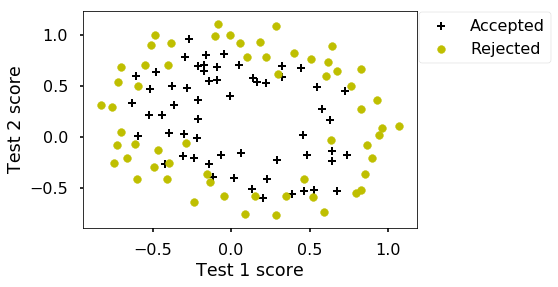

In [93]:
plotData(data2, 'Test 1 score', 'Test 2 score', 'Accepted', 'Rejected')

#### Feature Mapping

Here,before regularization, we will create more features for each data point. We will map the features into all polynomial terms of x1 and x2 upto the sixth power.

In [104]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
XX   = poly.fit_transform(data2[:,0:2])
XX.shape

(118, 28)

#### Regularized Cost Function

![R_cost_func](Regularized_cost_func.PNG)

In [109]:
def RegCostfunc(theta,lambda_,*args):
    m=y.size
    hypothesis=sigmoid(XX.dot(theta))
    J= (-1/m)*(np.log(hypothesis).T.dot(y1) + np.log(1-hypothesis).T.dot(1-y1))+ ((lambda_)/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

#### Partial Derivative
![PD](gradient_pd1.PNG)

In [108]:
def RegGradientfunc(theta,lambda_,*args):
    m=y.size
    hypothesis=sigmoid(XX.dot(theta.reshape(-1,1)))

    grad =(1/m)*XX.T.dot(hypothesis-y1) + (lambda_/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    return(grad.flatten())

In [110]:
initial_theta = np.zeros(XX.shape[1])
RegCostfunc(initial_theta, 1, XX, y1)

0.81791367306073537

C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


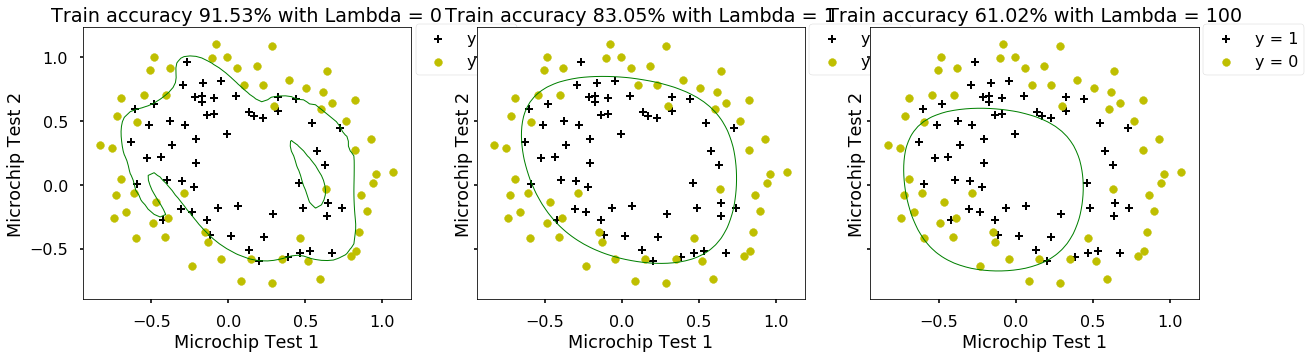

In [157]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(20,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0, 1, 100]):
    # Optimize costFunctionReg
    res2 = minimize(RegCostfunc, initial_theta, args=(C, XX, y1), method=None, jac=RegGradientfunc, options={'maxiter':3000})
    
    # Accuracy
    accuracy = 100*sum(predict(res2.x, XX) == y1.ravel())/y1.size    

    # Scatter plot of X,y
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # Plot decisionboundary
    x1_min, x1_max = X1[:,0].min(), X1[:,0].max(),
    x2_min, x2_max = X1[:,1].min(), X1[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')    
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))